In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
raw_data = pd.read_csv('../raw_data/Fraud.csv')

### Raw data analysis & data cleaning

In [8]:
raw_data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [38]:
# as isFraud is a target variable, change the order of columns to make visually more clear 
raw_data_cols = raw_data.columns.to_list()
reordered_cols = raw_data_cols[:-2] + [raw_data_cols[-1], raw_data_cols[-2]]
reordered_cols_data = raw_data[reordered_cols]
reordered_cols_data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [56]:
reordered_cols_data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFlaggedFraud    0
isFraud           0
dtype: int64

Count of non-fraudulent(0) and fraudulent(1) transactions:
0    6354407
1       8213
Name: isFraud, dtype: int64


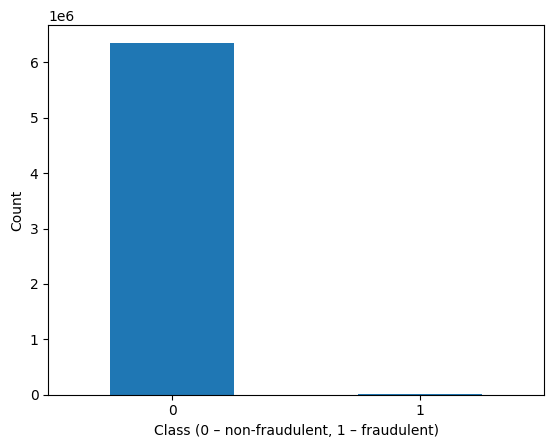

In [122]:
is_fraud_counts = reordered_cols_data['isFraud'].value_counts()
print(f'Count of non-fraudulent(0) and fraudulent(1) transactions:\n{is_fraud_counts}')
is_fraud_counts.plot(kind='bar')
plt.xlabel('Class (0 – non-fraudulent, 1 – fraudulent)')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.show()

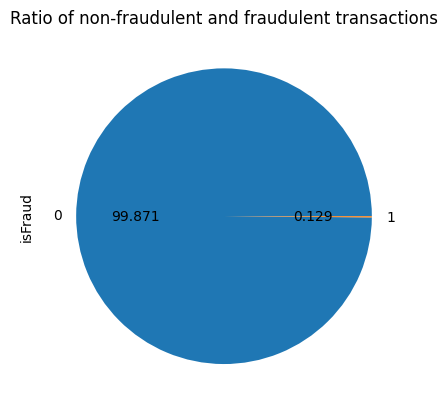

In [127]:
reordered_cols_data['isFraud'].value_counts().plot.pie(autopct='%.3f')
plt.title('Ratio of non-fraudulent and fraudulent transactions')
plt.show()

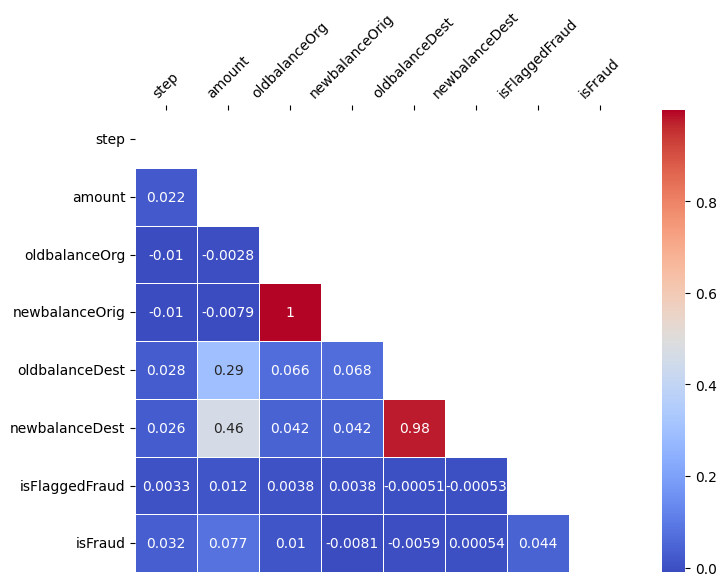

In [128]:
cor_matrix = reordered_cols_data.corr(numeric_only=True)
plt.figure(figsize=(8,6))
upper_triangle_to_hide = np.triu(cor_matrix)
correlation_map = sns.heatmap(cor_matrix, annot=True, linewidth=0.5, mask=upper_triangle_to_hide, cmap='coolwarm')
correlation_map.set_xticklabels(correlation_map.get_xticklabels(), rotation=45)
correlation_map.xaxis.tick_top()
plt.show()

In [95]:
reordered_cols_data.shape

(6362620, 11)

In [97]:
reordered_cols_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFlaggedFraud  int64  
 10  isFraud         int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [104]:
df_dropped_cols = reordered_cols_data.drop(['nameOrig', 'nameDest'], axis=1)
cols_to_rename = {'oldbalanceOrg': 'old_balance_orig',
                     'newbalanceOrg': 'new_balance_orig',
                     'oldbalanceDest': 'old_balance_dest',
                     'newbalanceDest': 'new_balance_dest',
                     'isFlaggedFraud': 'is_flagged_fraud',
                     'isFraud': 'is_fraud'
                    }
renamed_cols_df = df_dropped_cols.rename(columns=cols_to_rename)
renamed_cols_df.head()

,step,type,amount,old_balance_orig,newbalanceOrig,old_balance_dest,new_balance_dest,is_flagged_fraud,is_fraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,0,1
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [119]:
# check for all numerical values to be non-negative as all of them are amounts of money
print('Are there any negative values in numerical values columns:\n')
for i in range(2, 7):
    print(f'Column \'{renamed_cols_df.columns[i]}\': {(renamed_cols_df.iloc[:, i] < 0).any()}')

Are there any negative values in numerical values columns:

Column 'amount': False
Column 'old_balance_orig': False
Column 'newbalanceOrig': False
Column 'old_balance_dest': False
Column 'new_balance_dest': False


### Exploratory Data Analysis & understanding

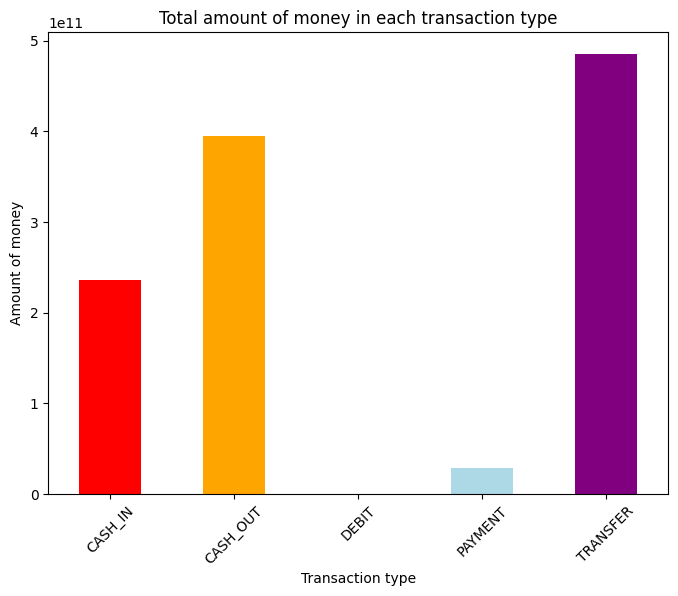

In [139]:
# see how much money is included into each type of transaction
grouped_by_type = renamed_cols_df.groupby('type').amount.sum()
plt.figure(figsize=(8, 6))
colors_list_for_types = ['red', 'orange', 'green', 'lightblue', 'purple']
grouped_by_type.plot(kind='bar', color=colors_list_for_types)
plt.xticks(rotation=45)
plt.xlabel('Transaction type')
plt.ylabel('Amount of money')
plt.title('Total amount of money in each transaction type')
plt.show()